# Packages

In [16]:
# !pip install eagerpy
# !pip install tensorflow_addons
# !pip install git+https://github.com/master/tensorflow-riemopt.git
# !pip install POT
# !pip install gudhi==3.4.1.post1
# !pip install tensorflow==2.6.2
# !pip install --upgrade numpy

In [3]:
!pip install gudhi==3.4.1.post1

  Attempting uninstall: gudhi
    Found existing installation: gudhi 3.5.0
    Uninstalling gudhi-3.5.0:
      Successfully uninstalled gudhi-3.5.0


In [5]:
!pip install tensorflow==2.6.2

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflowjs 2.8.4 requires h5py<3,>=2.8.0, but you'll have h5py 3.1.0 which is incompatible.
tensorflow-riemopt 0.1.0 requires tensorflow==2.6.3, but you'll have tensorflow 2.6.2 which is incompatible.
pot 0.8.1.0 requires numpy>=1.20, but you'll have numpy 1.19.5 which is incompatible.
aiohttp 3.6.3 requires yarl<1.6.0,>=1.0, but you'll have yarl 1.6.2 which is incompatible.



  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.3
    Uninstalling tensorflow-2.6.3:
      Successfully uninstalled tensorflow-2.6.3


In [6]:
!pip install --upgrade numpy

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.6.2 requires numpy~=1.19.2, but you'll have numpy 1.21.5 which is incompatible.
tensorflow-riemopt 0.1.0 requires tensorflow==2.6.3, but you'll have tensorflow 2.6.2 which is incompatible.



  Using cached numpy-1.21.5-cp37-cp37m-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


## Install POT

In [14]:
!pip install POT
!pip install --upgrade numpy

  Using cached numpy-1.21.5-cp37-cp37m-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.6.3 requires numpy~=1.19.2, but you'll have numpy 1.21.5 which is incompatible.


Requirement already up-to-date: numpy in c:\users\samih\anaconda3\envs\tf\lib\site-packages (1.21.5)


## Install gudhi + optmizer packages

In [10]:
!pip install gudhi

In [2]:
!pip install tensorflow_addons
!pip install git+https://github.com/master/tensorflow-riemopt.git

ERROR! Session/line number was not unique in database. History logging moved to new session 264
  Cloning https://github.com/master/tensorflow-riemopt.git to c:\users\samih\appdata\local\temp\pip-req-build-k_8fnti_
  Created wheel for tensorflow-riemopt: filename=tensorflow_riemopt-0.1.0-py3-none-any.whl size=45731 sha256=8da856c57fb996b86925eaee174bd2fe66b7ba8337dd56baeac46d3c8f2bd672
  Stored in directory: C:\Users\samih\AppData\Local\Temp\pip-ephem-wheel-cache-lapzs71i\wheels\f5\3c\6c\a6eebf4b391b6af4cb01f873345d494c35c02b3883636d1a94
Successfully built tensorflow-riemopt


In [3]:
!pip install eagerpy

## Import

In [1]:
import numpy               as np
import tensorflow_addons   as tfa
import tensorflow          as tf
import matplotlib.pyplot   as plt
import pandas              as pd
import gudhi               as gd
# import keras.backend as K

from gudhi.wasserstein     import wasserstein_distance
from sklearn.metrics       import pairwise_distances

import tensorflow_riemopt as manopt
import ot #pot

#import tensorflow_manopt as manopt <---- didn't work. ??

#from scipy.stats import wasserstein_distance

In [2]:
# import packages
import scipy
from scipy.stats import norm 
import time
import statsmodels.api as sm
import math

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import normalize
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.models import Model

In [4]:
from data_generation import *

## Original Rips Model

In [5]:
def Rips(DX, mel, dim, card):
    # Parameters: DX (distance matrix), 
    #             mel (maximum edge length for Rips filtration), 
    #             dim (homological dimension), 
    #             card (number of persistence diagram points, sorted by distance-to-diagonal)

    # Compute the persistence pairs with Gudhi
    rc = gd.RipsComplex(distance_matrix=DX, max_edge_length=mel)
    st = rc.create_simplex_tree(max_dimension=dim+1)
    dgm = st.persistence()
    pairs = st.persistence_pairs()

    # Retrieve vertices v_a and v_b by picking the ones achieving the maximal
    # distance among all pairwise distances between the simplex vertices
    indices, pers = [], []
    for s1, s2 in pairs:
        if len(s1) == dim+1 and len(s2) > 0:
            l1, l2 = np.array(s1), np.array(s2)
            i1 = [s1[v] for v in np.unravel_index(np.argmax(DX[l1,:][:,l1]),[len(s1), len(s1)])]
            i2 = [s2[v] for v in np.unravel_index(np.argmax(DX[l2,:][:,l2]),[len(s2), len(s2)])]
            indices += i1
            indices += i2
            pers.append(st.filtration(s2) - st.filtration(s1))
    
    # Sort points with distance-to-diagonal
    perm = np.argsort(pers)
    indices = list(np.reshape(indices, [-1,4])[perm][::-1,:].flatten())
    
    # Output indices
    indices = indices[:4*card] + [0 for _ in range(0,max(0,4*card-len(indices)))]
    return list(np.array(indices, dtype=np.int32))

class RipsModel(tf.keras.Model):
    def __init__(self, P, mel=12, dim=1, card=150):
        super(RipsModel, self).__init__()
        self.P = P
        self.mel = mel
        self.dim = dim
        self.card = card
        
    # Question: What is the purpose of this function?
    def call(self):
        m, d, c = self.mel, self.dim, self.card

        #Question: Why are distances being calculcated here? why does gradient keyword show up?

        # Compute distance matrix
        DX = tfa.losses.metric_learning.pairwise_distance(X)
        DXX = tf.reshape(DX, [1, DX.shape[0], DX.shape[1]])
        
        # Turn numpy function into tensorflow function
        XRipsTF = lambda DX: tf.numpy_function(Rips, [DX, m, d, c], [tf.int32 for _ in range(4*c)])
        
        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        Xids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(XRipsTF,DXX,dtype=[tf.int32 for _ in range(4*c)]))
        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        Xdgm = tf.reshape(tf.gather_nd(DX, tf.reshape(Xids, [2*c,2])), [c,2])


        #Z=X@self.P
        Z=self.P
        # Compute distance matrix
        DZ = tfa.losses.metric_learning.pairwise_distance(Z)
        DZZ = tf.reshape(DZ, [1, DZ.shape[0], DZ.shape[1]])
        
        # Turn numpy function into tensorflow function
        ZRipsTF = lambda DZ: tf.numpy_function(Rips, [DZ, m, d, c], [tf.int32 for _ in range(4*c)])
        
        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        Zids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(ZRipsTF,DZZ,dtype=[tf.int32 for _ in range(4*c)]))
        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        Zdgm = tf.reshape(tf.gather_nd(DZ, tf.reshape(Zids, [2*c,2])), [c,2])
        return (Xdgm,Zdgm)

## Modified RipsModel

In [26]:
def Rips(DX, mel, dim, card):
    # Parameters: DX (distance matrix), 
    #             mel (maximum edge length for Rips filtration), 
    #             dim (homological dimension), 
    #             card (number of persistence diagram points, sorted by distance-to-diagonal)

    # Compute the persistence pairs with Gudhi
    rc = gd.RipsComplex(distance_matrix=DX, max_edge_length=mel)
    st = rc.create_simplex_tree(max_dimension=dim+1)
    dgm = st.persistence()
    pairs = st.persistence_pairs()

    # Retrieve vertices v_a and v_b by picking the ones achieving the maximal
    # distance among all pairwise distances between the simplex vertices
    indices, pers = [], []
    for s1, s2 in pairs:
        if len(s1) == dim+1 and len(s2) > 0:
            l1, l2 = np.array(s1), np.array(s2)
            i1 = [s1[v] for v in np.unravel_index(np.argmax(DX[l1,:][:,l1]),[len(s1), len(s1)])]
            i2 = [s2[v] for v in np.unravel_index(np.argmax(DX[l2,:][:,l2]),[len(s2), len(s2)])]
            indices += i1
            indices += i2
            pers.append(st.filtration(s2) - st.filtration(s1))
    
    # Sort points with distance-to-diagonal
    perm = np.argsort(pers)
    indices = list(np.reshape(indices, [-1,4])[perm][::-1,:].flatten())
    
    # Output indices
    indices = indices[:4*card] + [0 for _ in range(0,max(0,4*card-len(indices)))]
    return list(np.array(indices, dtype=np.int32))

# the right one
class RipsModel(tf.keras.Model):
    def __init__(self, P, mel=12, dim=1, card=150):
        super(RipsModel, self).__init__()
        self.P = P
        self.mel = mel
        self.dim = dim
        self.card = card
        
    # Question: What is the purpose of this function?
    def call(self):
        m, d, c = self.mel, self.dim, self.card

        #Question: Why are distances being calculcated here? why does gradient keyword show up?

        # Compute distance matrix
        DX = tfa.losses.metric_learning.pairwise_distance(X)
        #DXX = tf.reshape(DX, [1, DX.shape[0], DX.shape[1]])
        DXX = tf.expand_dims(DX, axis = 0)

        
        # Turn numpy function into tensorflow function
        XRipsTF = lambda DX: tf.numpy_function(Rips, [DX, m, d, c], [tf.int32 for _ in range(4*c)])
        
        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        Xids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(XRipsTF,DXX,dtype=[tf.int32 for _ in range(4*c)]))
        #print("Xids",Xids)
        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        Xdgm = tf.reshape(tf.gather_nd(DX, tf.reshape(Xids, [2*c,2])), [c,2])


        Z=self.P
        #print("Z",Z)
        # Compute distance matrix
        DZ = tfa.losses.metric_learning.pairwise_distance(Z)
        #DZZ = tf.reshape(DZ, [1, DZ.shape[0], DZ.shape[1]])
        DZZ = tf.expand_dims(DZ, axis = 0)
        
        # Turn numpy function into tensorflow function
        ZRipsTF = lambda DZ: tf.numpy_function(Rips, [DZ, m, d, c], [tf.int32 for _ in range(4*c)])
        
        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        Zids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(ZRipsTF,DZZ,dtype=[tf.int32 for _ in range(4*c)]))
        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        Zdgm = tf.reshape(tf.gather_nd(DZ, tf.reshape(Zids, [2*c,2])), [c,2])
        return (Xdgm,Zdgm)

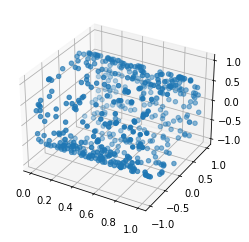

In [26]:
np.random.seed(1) #expand the cylinder into a rectangle and generate 300 points on it and then transform them back
n_samples = 500
ss3=np.random.uniform(0,2*np.pi,n_samples)
noise=np.random.normal(0,0.1,n_samples) #add noise if you want


noise = 0 #to cancel noise
xx=(1+noise)*np.cos(ss3)
yy=(1+noise)*np.sin(ss3)



rr3=np.random.uniform(0,1,n_samples) #a point (xx,yy,rr3) on 3D
ax = plt.subplot(111, projection='3d')
ax.scatter(rr3,xx,yy) 
X=np.array(np.mat([rr3,xx,yy]).T,dtype=np.float32)
Z=X[:,:2]
plt.show()

In [24]:
class CustomAccuracy1(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, X, Y):
        
        # SCALE X AND Y (or pdgms)
        fig, ax = plt.subplots()
        
        ax.scatter(Y.numpy()[:,0],Y.numpy()[:,1])
        plt.show()

        modelR = RipsModel(P=Y, mel=12, dim=1, card = 150)

#         #Compute persistence diagram
        Zdgm = modelR.call()[1]
        #sess=tf.compat.v1.InteractiveSession()
        D = Zdgm.numpy()      
        plt.figure()
        plt.scatter(D[:,0], D[:,1], c="blue", alpha=0.8)
        Xdgm = modelR.call()[0]
        D1 = Xdgm.numpy()
        plt.scatter(D1[:,0], D1[:,1],c="orange", alpha=0.5)
        plt.plot([0,0.5],[0,0.5])
        plt.show()



        # Loss is Wasserstein distance

        loss = tf.square(wasserstein_distance(Zdgm, Xdgm, order=2, internal_p=2, enable_autodiff=True))


        return loss

Epoch 1/2


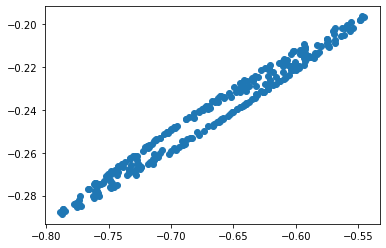

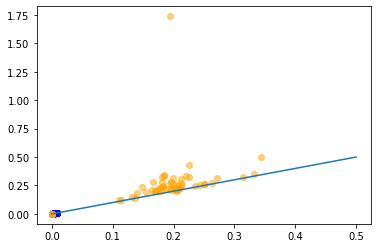

1/1 [==============================] - 61s 61s/step - loss: 1.3262
Epoch 2/2


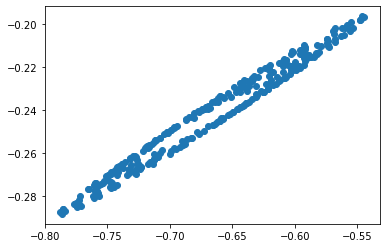

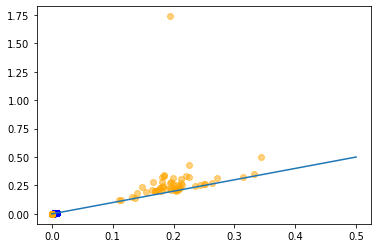

1/1 [==============================] - 65s 65s/step - loss: 1.3262


In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(3, )),
        tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(2, activation='sigmoid'),
        tf.keras.layers.Dense(2)
        ])
model.compile(loss=CustomAccuracy1(),optimizer = "adam",run_eagerly=True)
model.fit(X, X,epochs=2,batch_size=300)

# number of epochs increase
# increase learning rate (start with low -> run for a long time)

In [18]:
from tensorflow.keras import initializers

Epoch 1/3


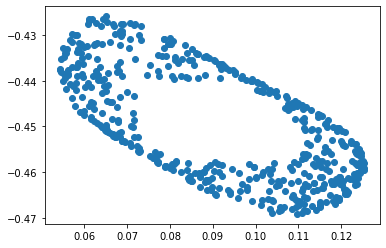

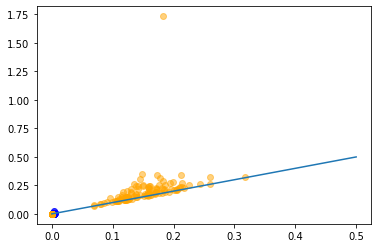

1/1 [==============================] - 622s 622s/step - loss: 1.3688
Epoch 2/3


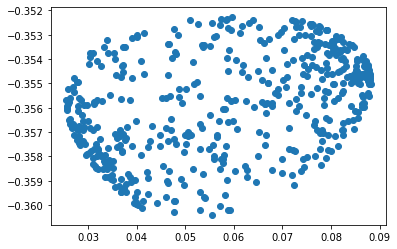

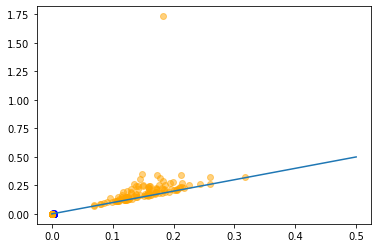

1/1 [==============================] - 448s 448s/step - loss: 1.3685
Epoch 3/3


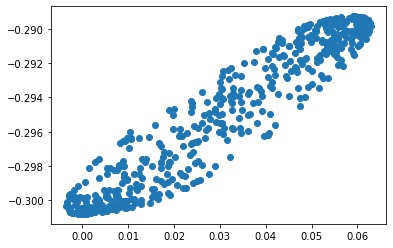

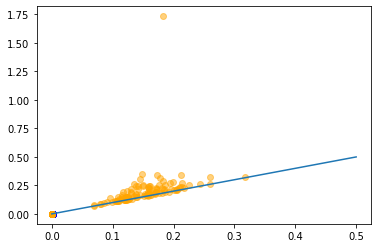

1/1 [==============================] - 289s 289s/step - loss: 1.3685


In [27]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(3, )),
        tf.keras.layers.Dense(3, activation='sigmoid', 
                              kernel_initializer=initializers.RandomNormal(stddev=1), 
                              bias_initializer='ones'),
        tf.keras.layers.Dense(3, activation='sigmoid'),
        tf.keras.layers.Dense(3)
        ])
model.compile(loss=CustomAccuracy1(),optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.1, name='Adam'),
              run_eagerly=True)
model.fit(X, X,epochs=3,batch_size=n_samples)


# number of epochs increase
# increase learning rate (start with low -> run for a long time)
# more depth (increase number of layers - layer size = 3 or 4)

# tune network
# sigmoid or relu
# change initializer
# verify output / sanity check
# for something known as input we want something known as output
# apply whitening
# after try: multiply data by n_samples^(1/dim) # use input dim for input data and output dim for output data 
# (thermodynamic regime, nearest neighbours)

# (if you increase sample size the scale should get smaller)

# 1/sqrt(n) * const
# scale so that marginal stdv is 1

# apply whitening to both data so stdv is 1 (use builtin) # scipy.cluster.vq.whiten(obs, check_finite=True)
# divide by stdv of each row

# problem: what do w scale after projection

In [16]:
model.predict(X)

array([[-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.31162435],
       [-0.2527759 , -0.30117658, -0.311

In [ ]:
'''
custom loss now works because of run_eagerly
optimizer not chosen specially
'''